In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel("/Users/tahsin/Documents/HCTRA/Transactions_by_date_type_loc.xlsx")

In [4]:
df.head(5)

,TXN_DATE_15_MIN,TRANSACTION_TYPE,PLAZA_NAME,TRANSACTION_COUNT
0,2020-01-01,TAG,90A,22
1,2020-01-01,TAG,ELDRW,6
2,2020-01-01,TAG,HDYN,53
3,2020-01-01,TAG,HDYS,62
4,2020-01-01,TAG,SAMC,253


In [5]:
df.tail(5)

,TXN_DATE_15_MIN,TRANSACTION_TYPE,PLAZA_NAME,TRANSACTION_COUNT
1048570,2020-05-24 03:15:00,TAG,SAMS,95
1048571,2020-05-24 03:15:00,TAG,SAMSE,48
1048572,2020-05-24 03:15:00,TAG,SAMSW,54
1048573,2020-05-24 03:15:00,TAG,SHIP,62
1048574,2020-05-24 03:15:00,TAG,TMB,16


In [6]:
df.describe()

,TRANSACTION_COUNT
count,1.048575e+06
mean,3.745520e+02
std,5.502883e+02
min,1.000000e+00
25%,3.100000e+01
50%,1.330000e+02
75%,4.950000e+02
max,4.149000e+03


In [7]:
df.shape

(1048575, 4)

In [8]:
df.isnull().values.any()

False

In [9]:
uniquePlaza = df["PLAZA_NAME"].unique()
print(uniquePlaza)
print(len(uniquePlaza))

['90A' 'ELDRW' 'HDYN' 'HDYS' 'SAMC' 'SAME' 'SAMN' 'SAMNE' 'SAMS' 'SAMSE'
 'SAMSW' 'SHIP' 'TMB' 'WIRTE' 'WIRTW' 'WLCRE' 'WLCRW' 'WPT' 'ELDRE' '59N'
 '45N' 290 '59S' '45S']
24


In [10]:
uniqueTransactionType = df["TRANSACTION_TYPE"].unique()
print(uniqueTransactionType)
print(len(uniqueTransactionType))

['TAG' 'VIDEO']
2


In [11]:
df.columns

Index(['TXN_DATE_15_MIN', 'TRANSACTION_TYPE', 'PLAZA_NAME',
       'TRANSACTION_COUNT'],
      dtype='object')

In [12]:
df.dtypes

TXN_DATE_15_MIN      datetime64[ns]
TRANSACTION_TYPE             object
PLAZA_NAME                   object
TRANSACTION_COUNT             int64
dtype: object

In [13]:
# Extract year, month, day and make new columns
df['YEAR']=pd.DatetimeIndex(df['TXN_DATE_15_MIN']).year
df['MONTH']=pd.DatetimeIndex(df['TXN_DATE_15_MIN']).month
df['DAY']=pd.DatetimeIndex(df['TXN_DATE_15_MIN']).day
df['DAY_OF_WEEK']=df['TXN_DATE_15_MIN'].dt.dayofweek
df['WEEK_DAY']=((pd.DatetimeIndex(df['TXN_DATE_15_MIN']).dayofweek)<5).astype(int)
df.head(5)


,TXN_DATE_15_MIN,TRANSACTION_TYPE,PLAZA_NAME,TRANSACTION_COUNT,YEAR,MONTH,DAY,DAY_OF_WEEK,WEEK_DAY
0,2020-01-01,TAG,90A,22,2020,1,1,2,1
1,2020-01-01,TAG,ELDRW,6,2020,1,1,2,1
2,2020-01-01,TAG,HDYN,53,2020,1,1,2,1
3,2020-01-01,TAG,HDYS,62,2020,1,1,2,1
4,2020-01-01,TAG,SAMC,253,2020,1,1,2,1


In [14]:
# extract hour, minute and make new columns
df['HOUR']=pd.DatetimeIndex(df['TXN_DATE_15_MIN']).hour
df['MINUTE']=pd.DatetimeIndex(df['TXN_DATE_15_MIN']).minute

df.tail(5)

,TXN_DATE_15_MIN,TRANSACTION_TYPE,PLAZA_NAME,TRANSACTION_COUNT,YEAR,MONTH,DAY,DAY_OF_WEEK,WEEK_DAY,HOUR,MINUTE
1048570,2020-05-24 03:15:00,TAG,SAMS,95,2020,5,24,6,0,3,15
1048571,2020-05-24 03:15:00,TAG,SAMSE,48,2020,5,24,6,0,3,15
1048572,2020-05-24 03:15:00,TAG,SAMSW,54,2020,5,24,6,0,3,15
1048573,2020-05-24 03:15:00,TAG,SHIP,62,2020,5,24,6,0,3,15
1048574,2020-05-24 03:15:00,TAG,TMB,16,2020,5,24,6,0,3,15


In [15]:
df["HOUR"].unique()
df["YEAR"].unique()

array([2020, 2021])

In [16]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=df['TXN_DATE_15_MIN'].dt.date.min(),end = df['TXN_DATE_15_MIN'].dt.date.max())
df['HOLIDAY'] = df['TXN_DATE_15_MIN'].dt.date.astype('datetime64').isin(holidays).astype(int)
df['WEEK_DAY'].loc[df["HOLIDAY"]==1]=0
df.head(5)

/Users/tahsin/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,TXN_DATE_15_MIN,TRANSACTION_TYPE,PLAZA_NAME,TRANSACTION_COUNT,YEAR,MONTH,DAY,DAY_OF_WEEK,WEEK_DAY,HOUR,MINUTE,HOLIDAY
0,2020-01-01,TAG,90A,22,2020,1,1,2,0,0,0,1
1,2020-01-01,TAG,ELDRW,6,2020,1,1,2,0,0,0,1
2,2020-01-01,TAG,HDYN,53,2020,1,1,2,0,0,0,1
3,2020-01-01,TAG,HDYS,62,2020,1,1,2,0,0,0,1
4,2020-01-01,TAG,SAMC,253,2020,1,1,2,0,0,0,1


In [17]:
print(df[df.HOLIDAY==1].count())
print(df[df.WEEK_DAY==1].count())


TXN_DATE_15_MIN      19583
TRANSACTION_TYPE     19583
PLAZA_NAME           19583
TRANSACTION_COUNT    19583
YEAR                 19583
MONTH                19583
DAY                  19583
DAY_OF_WEEK          19583
WEEK_DAY             19583
HOUR                 19583
MINUTE               19583
HOLIDAY              19583
dtype: int64
TXN_DATE_15_MIN      738225
TRANSACTION_TYPE     738225
PLAZA_NAME           738225
TRANSACTION_COUNT    738225
YEAR                 738225
MONTH                738225
DAY                  738225
DAY_OF_WEEK          738225
WEEK_DAY             738225
HOUR                 738225
MINUTE               738225
HOLIDAY              738225
dtype: int64


In [18]:
df = df.drop(["TXN_DATE_15_MIN","HOLIDAY"],axis=1)
df.head(5)

,TRANSACTION_TYPE,PLAZA_NAME,TRANSACTION_COUNT,YEAR,MONTH,DAY,DAY_OF_WEEK,WEEK_DAY,HOUR,MINUTE
0,TAG,90A,22,2020,1,1,2,0,0,0
1,TAG,ELDRW,6,2020,1,1,2,0,0,0
2,TAG,HDYN,53,2020,1,1,2,0,0,0
3,TAG,HDYS,62,2020,1,1,2,0,0,0
4,TAG,SAMC,253,2020,1,1,2,0,0,0


In [20]:
print(holidays)
#k = df['TXN_DATE_15_MIN'].dt.date.astype('datetime64').isin(holidays)
#print(k)

DatetimeIndex(['2020-01-01', '2020-01-20', '2020-02-17', '2020-05-25',
               '2020-07-03', '2020-09-07', '2020-10-12', '2020-11-11',
               '2020-11-26', '2020-12-25', '2021-01-01', '2021-01-18',
               '2021-02-15'],
              dtype='datetime64[ns]', freq=None)


In [21]:
df.columns

Index(['TRANSACTION_TYPE', 'PLAZA_NAME', 'TRANSACTION_COUNT', 'YEAR', 'MONTH',
       'DAY', 'DAY_OF_WEEK', 'WEEK_DAY', 'HOUR', 'MINUTE'],
      dtype='object')

In [22]:
df = df [['YEAR', 'MONTH', 'DAY', 'HOUR','MINUTE', 'DAY_OF_WEEK', 'WEEK_DAY','TRANSACTION_TYPE', 'PLAZA_NAME',
          'TRANSACTION_COUNT' ]]

In [23]:
df.head(5)

,YEAR,MONTH,DAY,HOUR,MINUTE,DAY_OF_WEEK,WEEK_DAY,TRANSACTION_TYPE,PLAZA_NAME,TRANSACTION_COUNT
0,2020,1,1,0,0,2,0,TAG,90A,22
1,2020,1,1,0,0,2,0,TAG,ELDRW,6
2,2020,1,1,0,0,2,0,TAG,HDYN,53
3,2020,1,1,0,0,2,0,TAG,HDYS,62
4,2020,1,1,0,0,2,0,TAG,SAMC,253


In [24]:
df.shape
df.MONTH.unique()

array([1, 2, 3, 4, 5])

In [25]:
df.to_csv("/Users/tahsin/Documents/HCTRA/Updated_Transactions_by_date_type_loc.csv", index = False)

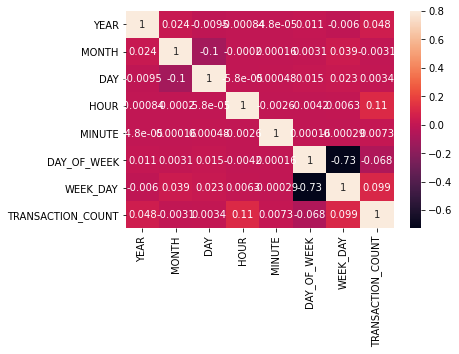

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

#correaltion matrix
numeric_features = df.select_dtypes(include=[np.number])
corr_matrix = numeric_features.corr()
sns.heatmap(corr_matrix, vmax=.8, annot=True)
plt.show()

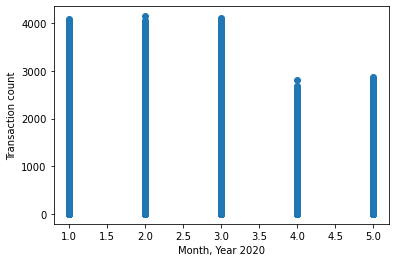

In [27]:
df_2020 = df[df["YEAR"]==2020]
plt.scatter(x=df_2020['MONTH'], y=df_2020['TRANSACTION_COUNT'])
plt.ylabel('Transaction count')
plt.xlabel('Month, Year 2020')
plt.show()

### Transaction count per month in 2020 and 2021

In [28]:
df_transac_by_month = df.groupby(['YEAR','MONTH'])['TRANSACTION_COUNT'].sum().reset_index()
#print(df_transac_by_month)

df_transac_by_month_2020 = df_transac_by_month.loc[df_transac_by_month["YEAR"]==2020].set_index("MONTH")
df_transac_by_month_2021 = df_transac_by_month.loc[df_transac_by_month["YEAR"]==2021].set_index("MONTH")
#print(df_transac_by_month_2020,df_transac_by_month_2021)

#df_percentage_change = df_transac_by_month_2020[["MONTH"]]
df_percentage_change = pd.DataFrame()
#df_percentage_change["MONTHS"] = pd.Series([*range(1,6,1)])
df_percentage_change["PERCENTAGE_CHANGE"] = 100*((df_transac_by_month_2021["TRANSACTION_COUNT"] - df_transac_by_month_2020["TRANSACTION_COUNT"])/df_transac_by_month_2020["TRANSACTION_COUNT"])
print(df_percentage_change)


       PERCENTAGE_CHANGE
MONTH                   
1              -9.239687
2             -24.487286
3              30.352216
4              57.374254
5              46.544800


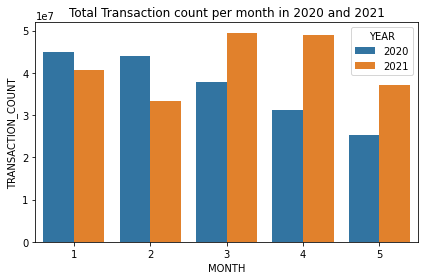

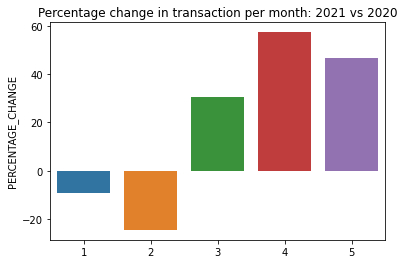

In [77]:
ax = sns.barplot(x=df_transac_by_month['MONTH'],y=df_transac_by_month['TRANSACTION_COUNT'],hue=df_transac_by_month["YEAR"])
plt.title("Total Transaction count per month in 2020 and 2021")
plt.tight_layout()
plt.show()

#ax2 = sns.distplot(df_percentage_change["PERCENTAGE_CHANGE"])
#plt.plot(df_percentage_change["PERCENTAGE_CHANGE"])
ax = sns.barplot(x=[*range(1,6,1)],y=df_percentage_change['PERCENTAGE_CHANGE'])
plt.title("Percentage change in transaction per month: 2021 vs 2020")
plt.show()

In [30]:
# Average and total trasaction per year
df_transac_by_year = df.groupby(['YEAR'])['TRANSACTION_COUNT'].sum().reset_index()
df_transac_by_year["AVG"] = df_transac_by_year['TRANSACTION_COUNT']/5
print(df_transac_by_year)



   YEAR  TRANSACTION_COUNT         AVG
0  2020          183250424  36650084.8
1  2021          209495486  41899097.2


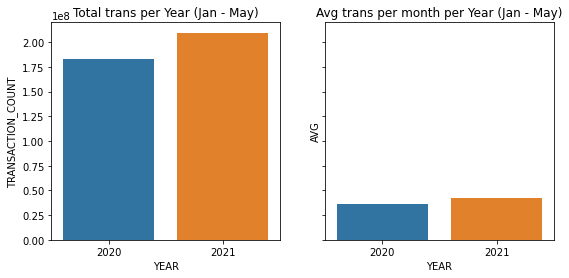

In [31]:
#fig = plt.figure()
#ax1 = fig.add_subplot(1, 2, 1)
#ax2 = fig.add_subplot(1, 2, 2)

fig , axes = plt.subplots(1,2, figsize = (9,4), sharey = True)

sns.barplot(ax=axes[0], x = "YEAR", y = "TRANSACTION_COUNT", data = df_transac_by_year)
#ax1.plot(df_transac_by_year["YEAR"],df_transac_by_year['TRANSACTION_COUNT'])
axes[0].set_title("Total trans per Year (Jan - May)")

sns.barplot(ax= axes[1], x = "YEAR", y = "AVG", data = df_transac_by_year)
axes[1].set_title("Avg trans per month per Year (Jan - May)")


#plt.tight_layout()
plt.show()

### Types of Transactions

In [72]:
df_transac_by_type = df.groupby(['TRANSACTION_TYPE','YEAR'])['TRANSACTION_COUNT'].sum().reset_index()
print(df_transac_by_type)
#print(df.TRANSACTION_COUNT.sum())
#print(df_transac_by_type.TRANSACTION_COUNT.sum())


  TRANSACTION_TYPE  YEAR  TRANSACTION_COUNT
0              TAG  2020          135629051
1              TAG  2021          134517904
2            VIDEO  2020           47621373
3            VIDEO  2021           74977582


Text(0.5, 1.0, 'Total Transactions per Year by Type (Tag/Video) ')

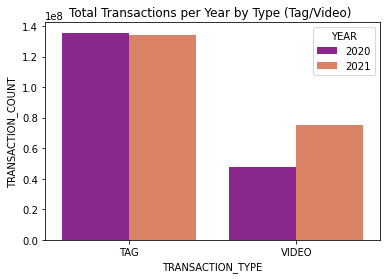

In [74]:
sns.barplot(x = "TRANSACTION_TYPE", y = "TRANSACTION_COUNT", hue="YEAR", data = df_transac_by_type, palette = "plasma")
plt.title("Total Transactions per Year by Type (Tag/Video) ")

In [81]:
df_transac_by_type_month = df.groupby(['TRANSACTION_TYPE','YEAR','MONTH'])['TRANSACTION_COUNT'].sum().reset_index()
df_transac_by_video_month = df_transac_by_type_month[df_transac_by_type_month["TRANSACTION_TYPE"]=="VIDEO"]
df_transac_by_tag_month = df_transac_by_type_month[df_transac_by_type_month["TRANSACTION_TYPE"]=="TAG"]
print(df_transac_by_type_month)

   TRANSACTION_TYPE  YEAR  MONTH  TRANSACTION_COUNT
0               TAG  2020      1           35968288
1               TAG  2020      2           35268723
2               TAG  2020      3           28080749
3               TAG  2020      4           19373463
4               TAG  2020      5           16937828
5               TAG  2021      1           26352343
6               TAG  2021      2           21376449
7               TAG  2021      3           31664734
8               TAG  2021      4           31453585
9               TAG  2021      5           23670793
10            VIDEO  2020      1            8872334
11            VIDEO  2020      2            8748503
12            VIDEO  2020      3            9864345
13            VIDEO  2020      4           11803312
14            VIDEO  2020      5            8332879
15            VIDEO  2021      1           14345146
16            VIDEO  2021      2           11862153
17            VIDEO  2021      3           17797537
18          

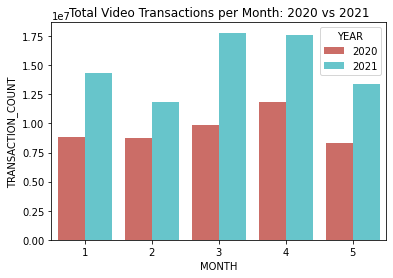

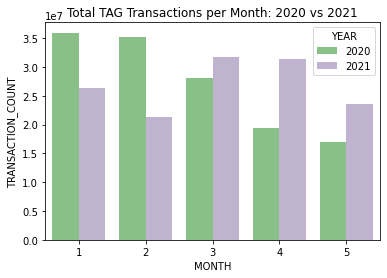

In [85]:
sns.barplot(x = "MONTH", y = "TRANSACTION_COUNT", hue="YEAR", data = df_transac_by_video_month, palette="hls")
plt.title("Total Video Transactions per Month: 2020 vs 2021")
plt.show()

sns.barplot(x = "MONTH", y = "TRANSACTION_COUNT", hue="YEAR", data = df_transac_by_tag_month, palette="Accent")
plt.title("Total TAG Transactions per Month: 2020 vs 2021")
plt.show()

### Total Transactions per Day of week 

In [90]:
df_transac_by_day = df.groupby(['DAY_OF_WEEK'])['TRANSACTION_COUNT'].sum().reset_index()
print(df_transac_by_day)

   DAY_OF_WEEK  TRANSACTION_COUNT
0            0           57470593
1            1           59549628
2            2           60360797
3            3           63483128
4            4           67439783
5            5           49101033
6            6           35340948


Text(0.5, 1.0, 'Total Transactions per Day (0=Monday, 6=Sunday)')

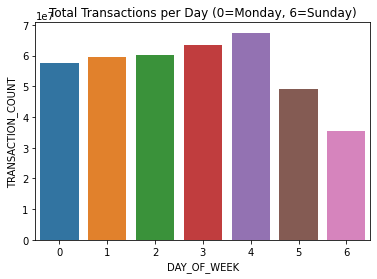

In [91]:
sns.barplot(x = "DAY_OF_WEEK", y = "TRANSACTION_COUNT", data = df_transac_by_day)
plt.title("Total Transactions per Day (0=Monday, 6=Sunday)")

In [93]:
df_video = df[df["TRANSACTION_TYPE"]=="VIDEO"]
df_transac_by_day_video = df_video.groupby(['DAY_OF_WEEK'])['TRANSACTION_COUNT'].sum().reset_index()

Text(0.5, 1.0, 'Total Video Transactions per Day (0=Monday, 6=Sunday)')

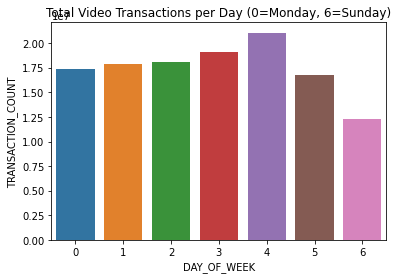

In [95]:
sns.barplot(x = "DAY_OF_WEEK", y = "TRANSACTION_COUNT", data = df_transac_by_day_video)
plt.title("Total Video Transactions per Day (0=Monday, 6=Sunday)")